# Example for the Wigner-Ville distribution

## Linear FM

In [2]:
using Winston;
using Color;
import DSP
using PyPlot

In [15]:
include("sampledata.jl")
include("jnufft.jl")
include("cohenclass.jl")
include("extif.jl")
include("juwutils.jl");

### large modulation

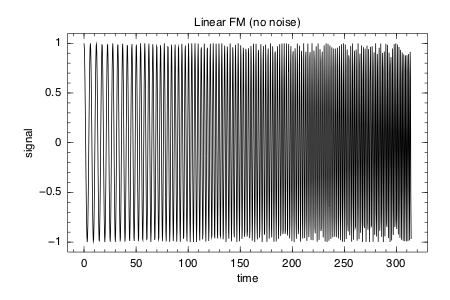

In [4]:
nsample=1024
x,y,iw,ynorm=sampledata.genlinfm(nsample,1.0,0.01);
p = FramedPlot(title="Linear FM (no noise)",xlabel="time",ylabel="signal");
add(p, Curve(x,y))

In [8]:
### generate the analytic signal of y
zs=DSP.Util.hilbert(y); 

In [9]:
### extracting the IF from the Time Frequency Representation
tfrs=cohenclass.tfrwv(zs);

Single Wigner Ville
Use fft.


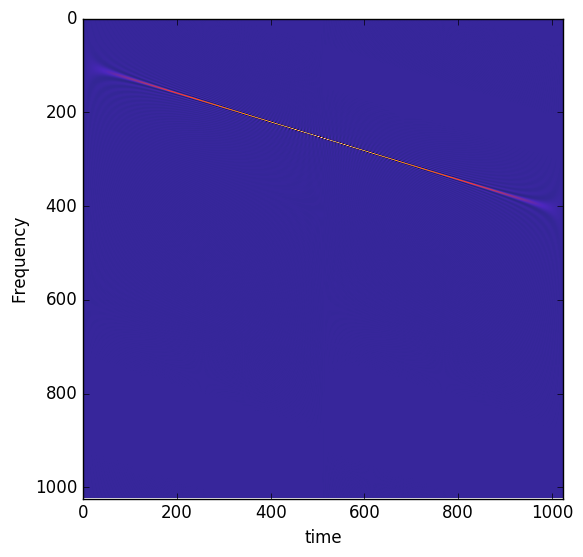

PyObject <matplotlib.text.Text object at 0x31a53acd0>

In [10]:
a=PyPlot.imshow(real(tfrs[:,:]),cmap="CMRmap");
PyPlot.xlabel("time")
PyPlot.ylabel("Frequency")

In [16]:
### extracting the IF from the Time Frequency Representation
indfs=extif.maxif(abs(tfrs));
dx=x[2]-x[1]
if_ffts=juwutils.index_to_frequency(indfs,NaN,dx,nsample);

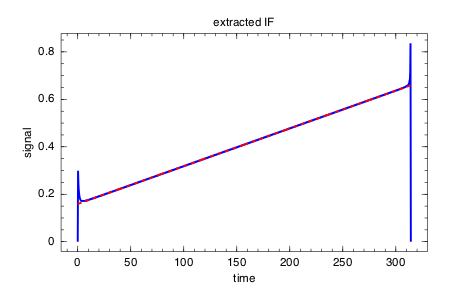

In [18]:
### display the extracted IF
p = FramedPlot(title="extracted IF",xlabel="time",ylabel="signal");
add(p, Curve(x,if_ffts,color="blue",width=5))
add(p, Curve(x,iw/(2*pi),kind="dashed",color="red",width=5))

### small modulation

In [19]:
nsample=1024
x,y,iw,ynorm=sampledata.genlinfm(nsample,1.0,0.0001);

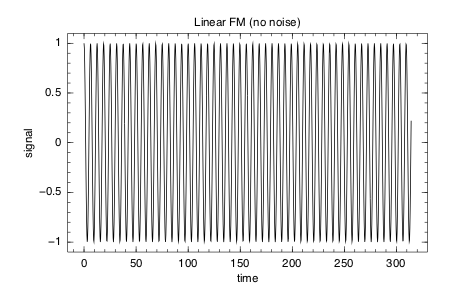

In [20]:
p = FramedPlot(title="Linear FM (no noise)",xlabel="time",ylabel="signal");
add(p, Curve(x,y))

In [21]:
### z is the analytic signal of y
z=DSP.Util.hilbert(y); 

### Wigner-Ville distribution with FFT

In [22]:
tfr=cohenclass.tfrwv(z);

Single Wigner Ville
Use fft.


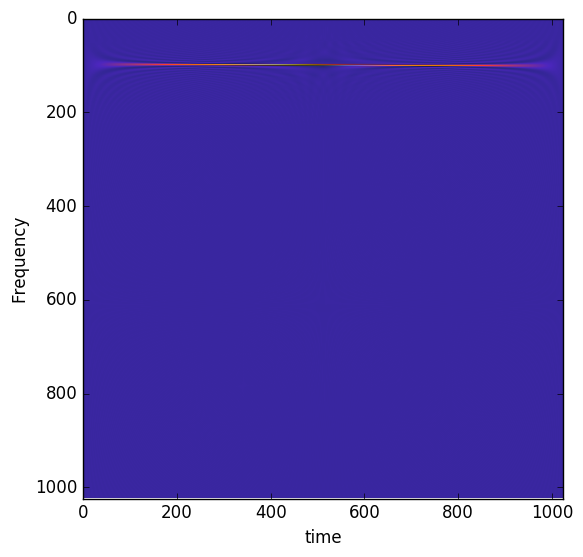

PyObject <matplotlib.text.Text object at 0x31cab0290>

In [23]:
a=PyPlot.imshow(real(tfr[:,:]),cmap="CMRmap");
PyPlot.xlabel("time")
PyPlot.ylabel("Frequency")

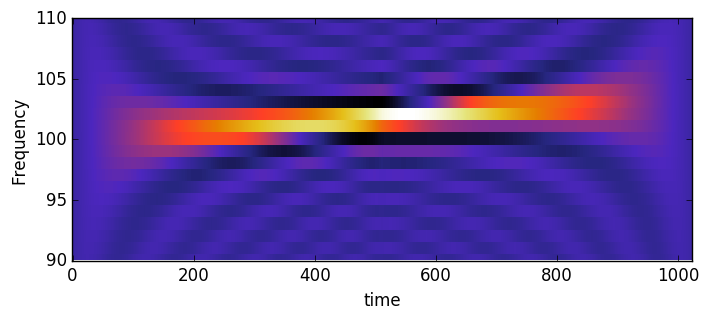

PyObject <matplotlib.text.Text object at 0x31adbf910>

In [24]:
a=PyPlot.imshow(real(tfr[:,:]),cmap="CMRmap",aspect=20,interpolation="nearest");
PyPlot.ylim(90,110)
PyPlot.xlabel("time")
PyPlot.ylabel("Frequency")

In [25]:
indf=extif.maxif(abs(tfr));
dx=x[2]-x[1]
if_fft=juwutils.index_to_frequency(indf,NaN,dx,nsample);

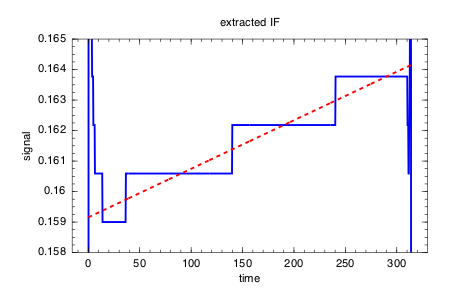

In [26]:
p = FramedPlot(title="extracted IF",xlabel="time",ylabel="signal",yrange=(0.158,0.165));
add(p, Curve(x,if_fft,color="blue",width=5))
add(p, Curve(x,iw/(2*pi),kind="dashed",color="red",width=5))

In [27]:
### As shown in the above figure, the FFT(DFT) cannot provide the sufficient resolution of the frequency.

### using Non-Uniform FFT

In [28]:
fin=collect(linspace(90,110,1024));
tfrnufft=cohenclass.tfrpwv(z,NaN,NaN,fin,NaN,NaN,0);

Single pseudo Wigner Ville
Use nufft.


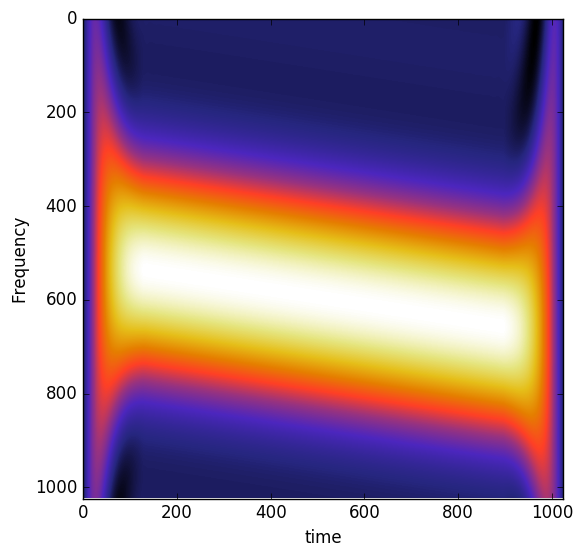

PyObject <matplotlib.text.Text object at 0x3261ffc10>

In [29]:
a=PyPlot.imshow(real(tfrnufft),cmap="CMRmap");
PyPlot.xlabel("time")
PyPlot.ylabel("Frequency")

In [30]:
indnf=extif.maxif(abs(tfrnufft));
dx=x[2]-x[1]
if_nufft=juwutils.index_to_frequency(indnf,fin,dx,nsample);

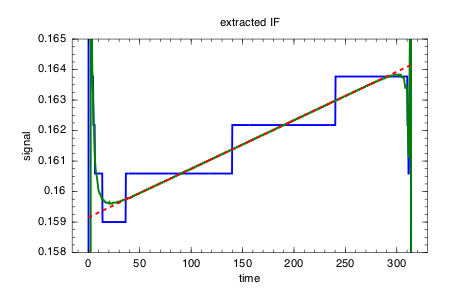

In [31]:
p = FramedPlot(title="extracted IF",xlabel="time",ylabel="signal",yrange=(0.158,0.165));
add(p, Curve(x,if_fft,color="blue",width=5))
add(p, Curve(x,if_nufft,color="green",width=5))
add(p, Curve(x,iw/(2*pi),kind="dashed",color="red",width=5))

In [32]:
### sufficient resolution with the Non-uniform FFT !  

### pseudo Wigner-Ville distribution using the Hamming window

In [33]:
tfrp=cohenclass.tfrpwv(z);

Single pseudo Wigner Ville
Use fft.


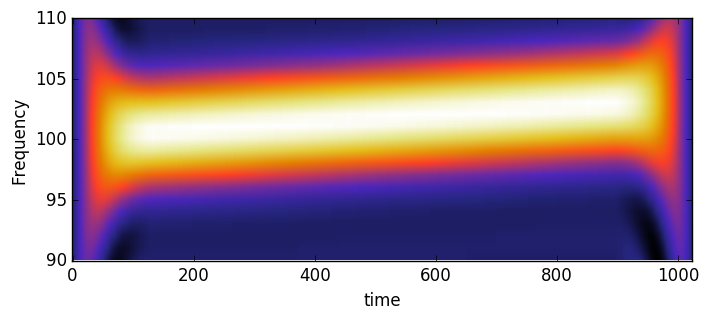

PyObject <matplotlib.text.Text object at 0x3272e5c90>

In [34]:
a=PyPlot.imshow(real(tfrp),cmap="CMRmap",aspect=20);
PyPlot.ylim(90,110)
PyPlot.xlabel("time")
PyPlot.ylabel("Frequency")

In [35]:
tfrpf=cohenclass.tfrpwv(z,NaN,NaN,fin,NaN,NaN,0);

Single pseudo Wigner Ville
Use nufft.


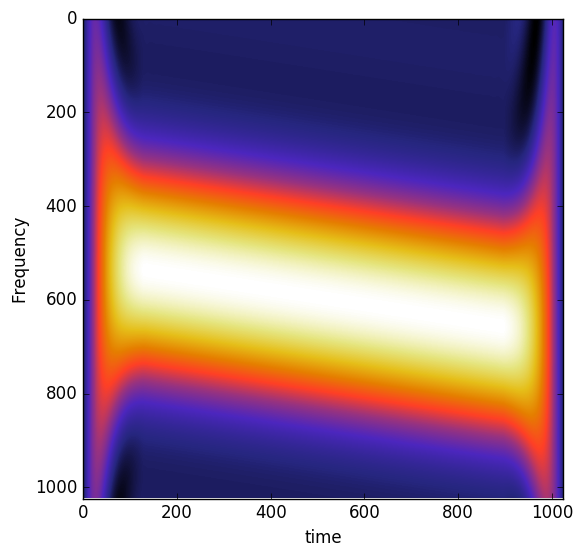

PyObject <matplotlib.text.Text object at 0x328c53910>

In [36]:
a=PyPlot.imshow(real(tfrpf),cmap="CMRmap");
PyPlot.xlabel("time")
PyPlot.ylabel("Frequency")

In [37]:
indnfp=extif.maxif(abs(tfrpf));
dx=x[2]-x[1]
if_nufftp=juwutils.index_to_frequency(indnfp,fin,dx,nsample);

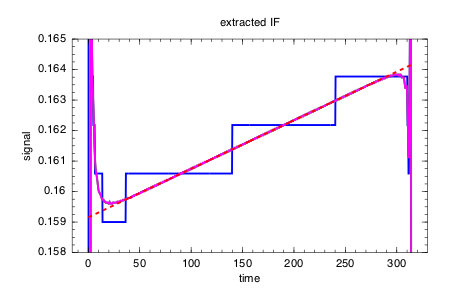

In [38]:
p = FramedPlot(title="extracted IF",xlabel="time",ylabel="signal",yrange=(0.158,0.165));
add(p, Curve(x,if_fft,color="blue",width=5))
add(p, Curve(x,if_nufft,color="green",width=5))
add(p, Curve(x,if_nufftp,color="magenta",width=5))
add(p, Curve(x,iw/(2*pi),kind="dashed",color="red",width=5))

### Short Time Fourier Tranform Test

In [39]:
include("stft.jl");

In [40]:
tfrstft=stft.tfrstft(y);

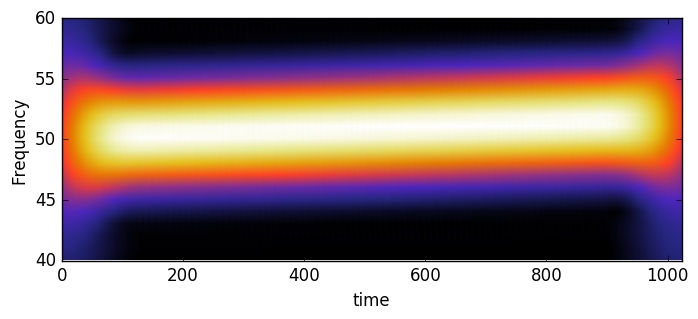

PyObject <matplotlib.text.Text object at 0x32abd9e90>

In [41]:
a=PyPlot.imshow(abs(tfrstft),cmap="CMRmap",aspect=20);
PyPlot.ylim(40,60)
PyPlot.xlabel("time")
PyPlot.ylabel("Frequency")